# Test `velocity_section_and_surface` Module

Render figure object produced by the `nowcast.figures.research.velocity_section_and_surface` module.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker
to help ensure that the module will work in the nowcast production context.

This notebook must be run in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
Also, it must be run on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
# reload lets us pull in changes from modules that we edit
from importlib import reload

In [2]:
import datetime
from glob import glob
import logging
import os
from pathlib import Path

import matplotlib

import arrow
import cmocean
from nemo_nowcast import NowcastWorker
import netCDF4 as nc
import scipy.io as sio

from nowcast import lib
from nowcast.figures.research import velocity_section_and_surface

In [3]:
import io

import yaml

In [4]:
%matplotlib inline

In [5]:
# Supress arrow.get() parser warnings re: changes coming in v0.15.0
# See https://github.com/crsmithdev/arrow/issues/612
# We don't use date strings that aren't included in the supported date tokens set mentioned in issue #612

import warnings
from arrow.factory import ArrowParseWarning

warnings.simplefilter("ignore", ArrowParseWarning)

The bits of `config/nowcast.yaml` that are required:

In [6]:
config = '''
    run_types:
        nowcast-green:
            bathymetry: /SalishSeaCast/grid/bathymetry_201702.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask201702.nc
        nowcast:
            bathymetry: /SalishSeaCast/grid/bathymetry_201702.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask201702.nc

    run:
        results_archive:
            nowcast-green: /results2/SalishSea/nowcast-green.201812/
            nowcast: /results/SalishSea/nowcast-blue.201812/
'''

config = yaml.safe_load(io.StringIO(config))

In [7]:
run_type = 'nowcast'
plot_type = 'research'
run_date = arrow.get('2019-07-30')

In [8]:
dmy = run_date.format('DDMMMYY').lower()
results_dir = Path(config['run']['results_archive'][run_type], dmy)
bathy = nc.Dataset(config['run_types'][run_type]['bathymetry'])
mesh_mask = nc.Dataset(config['run_types'][run_type]['mesh_mask'])

In [9]:
yyyymmdd = run_date.format('YYYYMMDD')

In [10]:
U = nc.Dataset(results_dir/f'SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_U.nc')
V = nc.Dataset(results_dir/f'SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_V.nc')
U_var = U.variables['vozocrtx']
V_var = V.variables['vomecrty']

/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:134: UserWarning: No contour levels were found within the data range.
  np.array(depths), [isobath], colors=color, zorder=zorder)


2.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


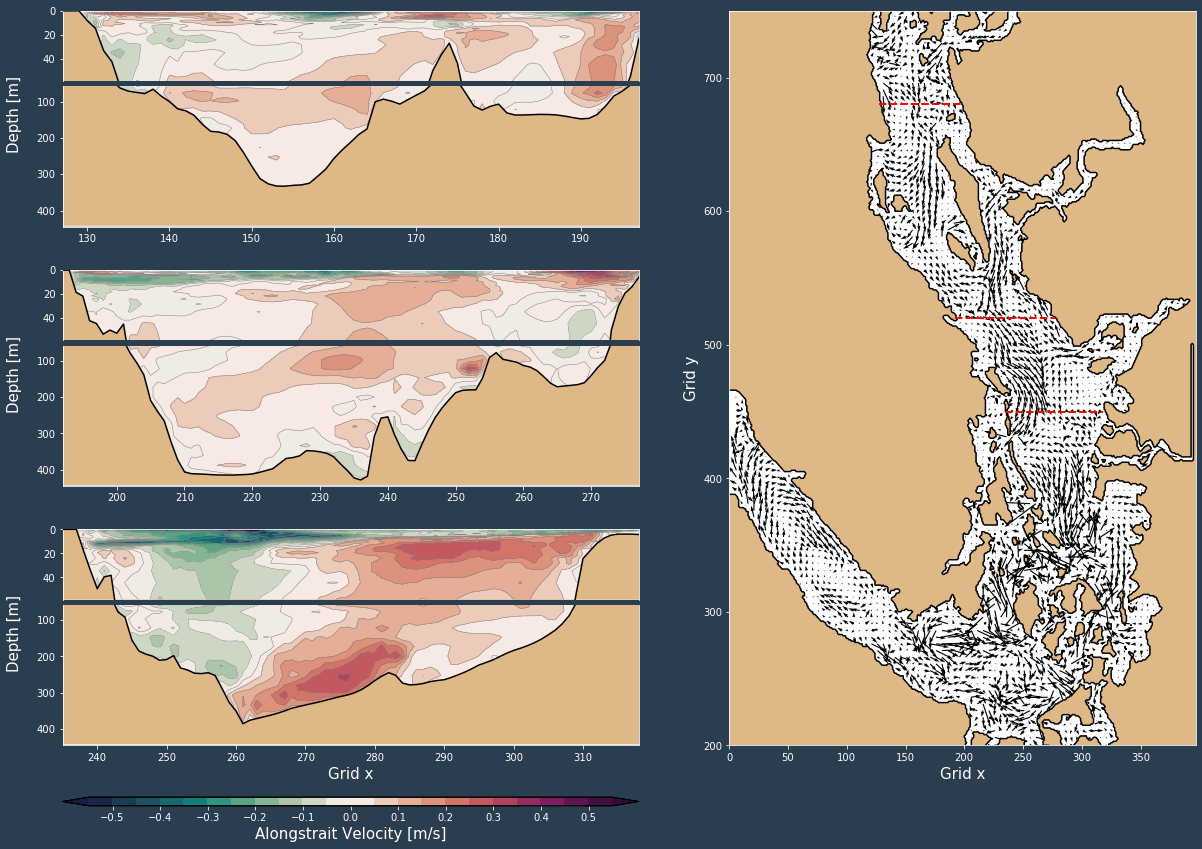

In [11]:
%%timeit -n1 -r1

# Layout parameters
sections = (450, 520, 680)
pos = (
    (0.1, 0.35),
    (0.4, 0.65),
    (0.7, 0.95)
)
section_lims = (
    (235, 318, 0, 445),
    (192, 277, 0, 445),
    (127, 197, 0, 445),
)

# Make figure
fig = velocity_section_and_surface.make_figure(
    U_var, V_var, bathy, mesh_mask,
    sections=sections, pos=pos, section_lims=section_lims
)